In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from scipy.stats import norm
from scipy import stats
%matplotlib inline

# Random Forest Model

In [58]:
zri = pd.read_csv('df.csv', index_col=0)


In [59]:
zri.columns

Index(['ZIPCODE', 'City', 'State', 'Metro', 'CountyName', 'SizeRank',
       'Year-Month', 'value', 'Month', 'Year', 'Season', 'AGIncome',
       'TotIncome', 'SalariesWages', 'NumUnemply', 'TotTaxes', 'FIPSCode',
       'Labor\nForce', 'Employed', 'Unemployed', 'Unemploy-\nment Rate\n(%)',
       'MortDeliq30-89', 'MortDeliq90', 'geo_id', 'total_pop', 'median_age',
       'white_pop', 'black_pop', 'asian_pop', 'hispanic_pop', 'gini_index',
       'income_per_capita', 'vacant_housing_units_for_rent',
       'percent_income_spent_on_rent', 'high_school_diploma',
       'associates_degree', 'bachelors_degree', 'masters_degree', 'year',
       'population_change', 'natural_amenity_rank'],
      dtype='object')

In [60]:
zri['MortDeliq30-89'] = zri['MortDeliq30-89'].fillna(zri['MortDeliq30-89'].mean())
zri['MortDeliq90'] = zri['MortDeliq90'].fillna(zri['MortDeliq90'].mean())

In [76]:
train = pd.merge(zri.loc[zri['Year']==2017].drop(columns = ['value']),
                 zri.loc[zri['Year']==2018][['ZIPCODE', 'Month','value']],
                 how = 'left', on = ['ZIPCODE', 'Month'])
test = pd.merge(zri.loc[zri['Year']==2018].drop(columns = ['value']),
                zri.loc[zri['Year']==2019][['ZIPCODE', 'Month','value']],
                how = 'left', on = ['ZIPCODE', 'Month'])

In [77]:
train = train.dropna(subset=['value'])
train = train.replace(np.nan, 0)

In [78]:
test = test.dropna(subset=['value'])
test = test.replace(np.nan, 0)

In [79]:
X_train = train.drop(columns = [ 'City', 'State', 'Metro', 'CountyName', 'SizeRank',
       'Year-Month', 'value', 'Month', 'Year', 'year', 'FIPSCode', 'geo_id'])
X_test = test.drop(columns = [ 'City', 'State', 'Metro', 'CountyName', 'SizeRank',
       'Year-Month', 'value', 'Month', 'Year','year', 'FIPSCode', 'geo_id'])
y_train = train['value']
y_test = test['value']

In [80]:
X_train['AGIncome'] = (X_train['AGIncome']*1000)/X_train['total_pop']
X_train['TotIncome'] = (X_train['TotIncome']*1000)/X_train['total_pop']
X_train['SalariesWages'] = (X_train['SalariesWages']*1000)/X_train['total_pop']
X_train['NumUnemply'] =(X_train['NumUnemply']*1000)/X_train['total_pop']
X_train['TotTaxes'] = (X_train['TotTaxes']*1000)/X_train['total_pop']
X_train = X_train.replace(np.nan, 0) 

In [81]:
X_test['AGIncome'] = (X_test['AGIncome']*1000)/X_test['total_pop']
X_test['TotIncome'] = (X_test['TotIncome']*1000)/X_test['total_pop']
X_test['SalariesWages'] = (X_test['SalariesWages']*1000)/X_test['total_pop']
X_test['NumUnemply'] = (X_test['NumUnemply']*1000)/X_test['total_pop']
X_test['TotTaxes'] = (X_test['TotTaxes']*1000)/X_test['total_pop']
X_test = X_test.replace(np.nan, 0)

In [82]:
X_train.columns

Index(['ZIPCODE', 'Season', 'AGIncome', 'TotIncome', 'SalariesWages',
       'NumUnemply', 'TotTaxes', 'Labor\nForce', 'Employed', 'Unemployed',
       'Unemploy-\nment Rate\n(%)', 'MortDeliq30-89', 'MortDeliq90',
       'total_pop', 'median_age', 'white_pop', 'black_pop', 'asian_pop',
       'hispanic_pop', 'gini_index', 'income_per_capita',
       'vacant_housing_units_for_rent', 'percent_income_spent_on_rent',
       'high_school_diploma', 'associates_degree', 'bachelors_degree',
       'masters_degree', 'population_change', 'natural_amenity_rank'],
      dtype='object')

look at scatterplots between zri and features

In [83]:
# (1)
from sklearn import ensemble
randomForest = ensemble.RandomForestRegressor(n_jobs = -1)

# fit RF model on training set
randomForest.set_params(random_state=0)
randomForest.fit(X_train, y_train) 

print("The training error is: %.5f" % (1 - randomForest.score(X_train, y_train)))
print("The test     error is: %.5f" % (1 - randomForest.score(X_test, y_test)))

The training error is: 0.00054
The test     error is: 0.24349


In [84]:
print(randomForest.score(X_train, y_train))
print(randomForest.score(X_test, y_test))

0.9994564428902053
0.7565063692384608


In [59]:
grid_para_forest = {
    'max_depth': range(1, 31),
    'n_estimators': range(10, 110, 10)
}
import sklearn.model_selection as ms

In [25]:
grid_search_forest = ms.GridSearchCV(randomForest, grid_para_forest, cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

/home/jack/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


CPU times: user 17.7 s, sys: 1.76 s, total: 19.5 s
Wall time: 1h 8min 54s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1

In [26]:
grid_search_forest.best_params_

{'max_depth': 21, 'n_estimators': 10}

In [27]:
grid_search_forest.best_score_

0.9928971145578723

In [85]:
feature_importance = list(zip(X_train.columns, randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
[i for (i, j) in feature_sort[0:5]]

[b'TotTaxes', b'ZIPCODE', b'Labor\nForc', b'Employed', b'vacant_hou']

Text(0.5, 1.0, 'feature importance')

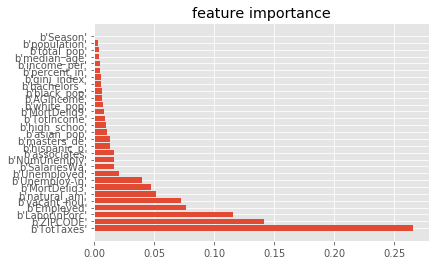

In [86]:
featureNames, featureScores = zip(*list(feature_sort))
plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)
plt.title('feature importance')

In [41]:
X_train.columns

Index(['Season', 'AGIncome', 'TotIncome', 'SalariesWages', 'NumUnemply',
       'TotTaxes', 'Unemploy-\nment Rate\n(%)', 'MortDeliq30-89',
       'MortDeliq90', 'total_pop', 'median_age', 'white_pop', 'black_pop',
       'asian_pop', 'hispanic_pop', 'gini_index', 'income_per_capita',
       'vacant_housing_units_for_rent', 'percent_income_spent_on_rent',
       'high_school_diploma', 'associates_degree', 'bachelors_degree',
       'masters_degree'],
      dtype='object')

In [42]:
X_train['NumUnemply']

0        208.333333
1        161.666667
2        161.666667
3        161.666667
4        145.000000
            ...    
66879      8.333333
66880      8.333333
66882      6.666667
66883      6.666667
66884      6.666667
Name: NumUnemply, Length: 54620, dtype: float64

In [87]:
from sklearn.model_selection import cross_val_score

print(np.sqrt(-1* cross_val_score(randomForest, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs =-1)))


[90.49627902 41.50794992 67.44479509 31.87342836 53.18303899]
